In [8]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "merlin-optical-sar":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import torch
import matplotlib.pyplot as plt

import utils.mvalab as mvalab
import utils.utils as utils
import utils.vistools as vistools
import utils.MI as MI

In [2]:
saclayopt = mvalab.imz2mat('data/Saclay/TelecomParisOPT.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : data/Saclay/TelecomParisOPT.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/3
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 3  verif :  1
1024 1024
-type U16
lecture de  data/Saclay/TelecomParisOPT.IMA  en quelconque 1024 1024 3  offset  0 <H 2  complex 0 blocksize 2097152
Boucle de lecture entre 0 et 3   sur 3 canaux
Lecture du canal 1/3
Données réelles. Nouvelle version de imz2mat  <H
Lecture du canal 2/3
Données réelles. Nouvelle version de imz2mat  <H
Lecture du canal 3/3
Données réelles. Nouvelle version de imz2mat  <H
retour tableau 3-D (1024x1024x3)


In [3]:
saclayz4 = mvalab.imz2mat('data/Saclay/TelecomParisZ4.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : data/Saclay/TelecomParisZ4.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/5
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 5  verif :  1
1024 1024
-type CFLOAT
lecture de  data/Saclay/TelecomParisZ4.IMA  en quelconque 1024 1024 5  offset  0 <f 4  complex 1 blocksize 8388608
Boucle de lecture entre 0 et 5   sur 5 canaux
Lecture du canal 1/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 2/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 3/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 4/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 5/5
Données complexes (standard). Nouvelle version de 


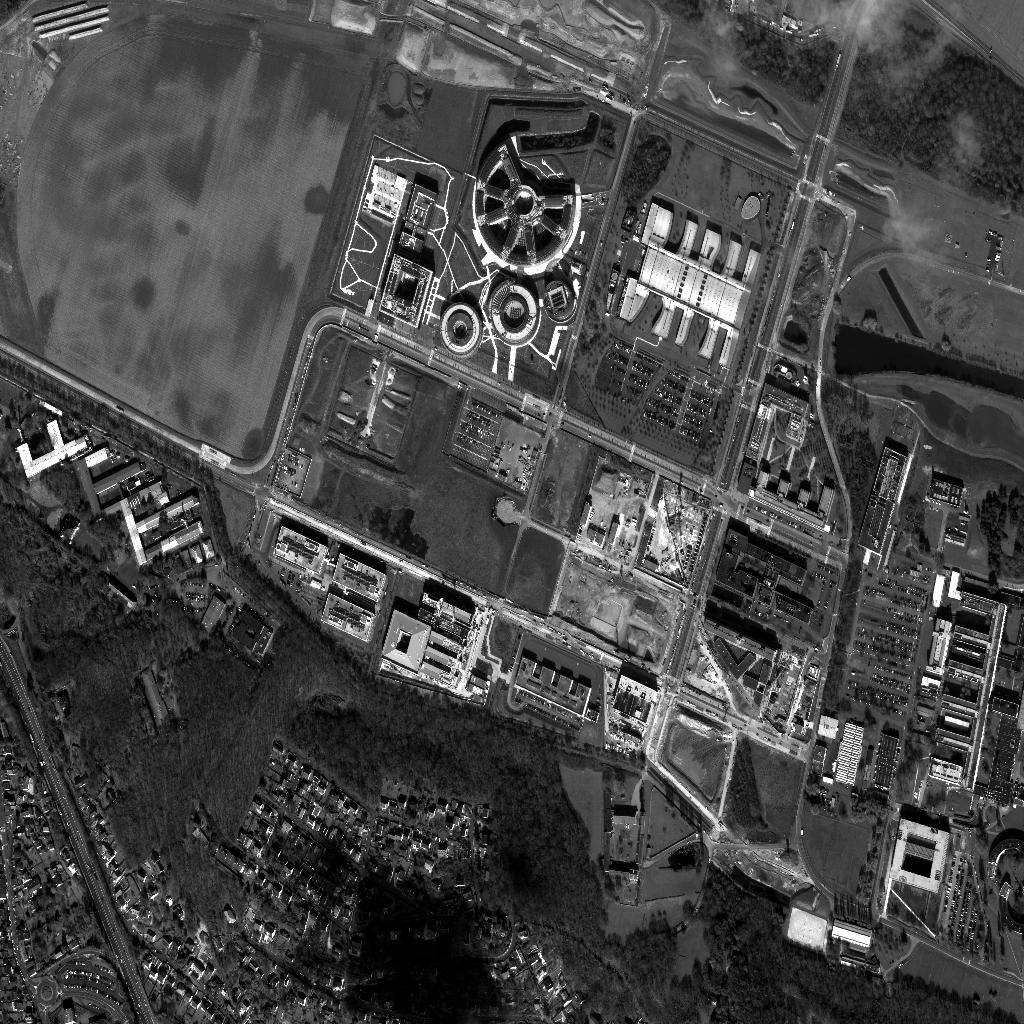
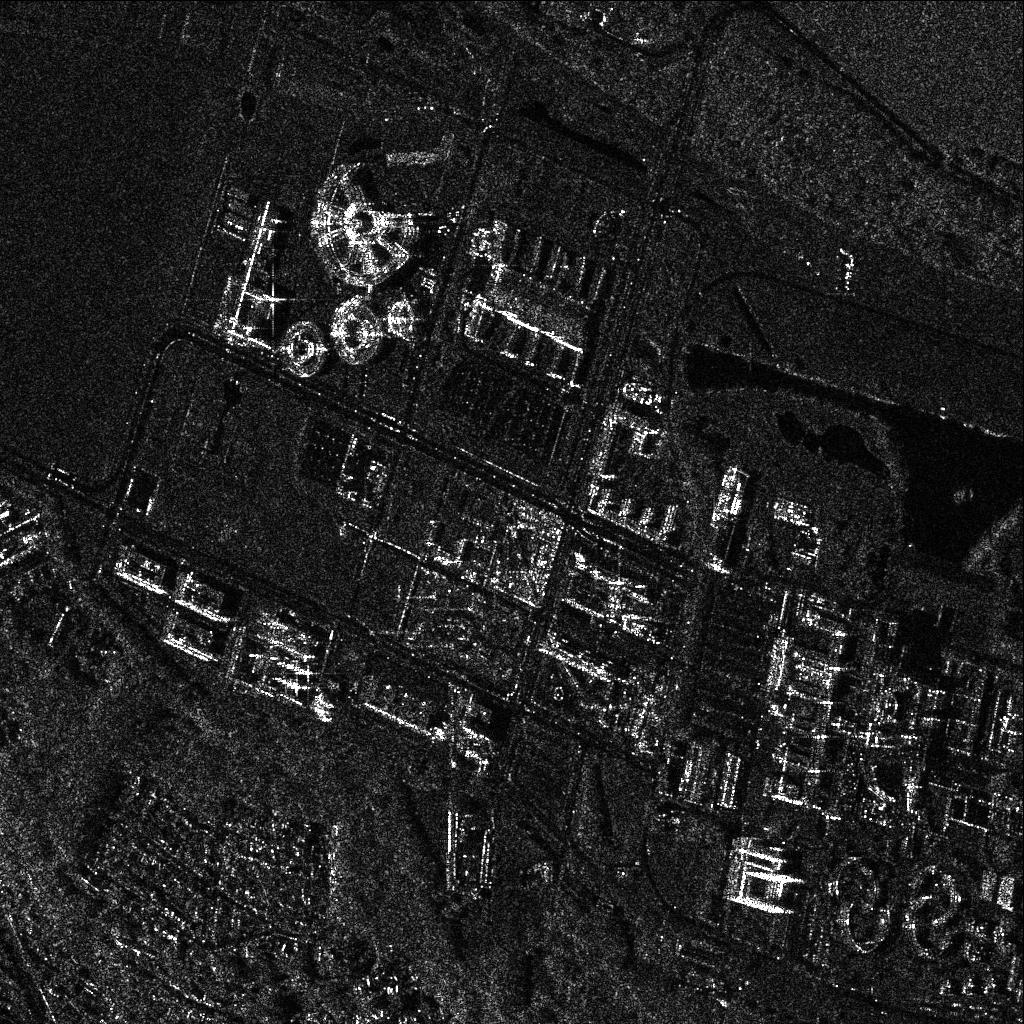
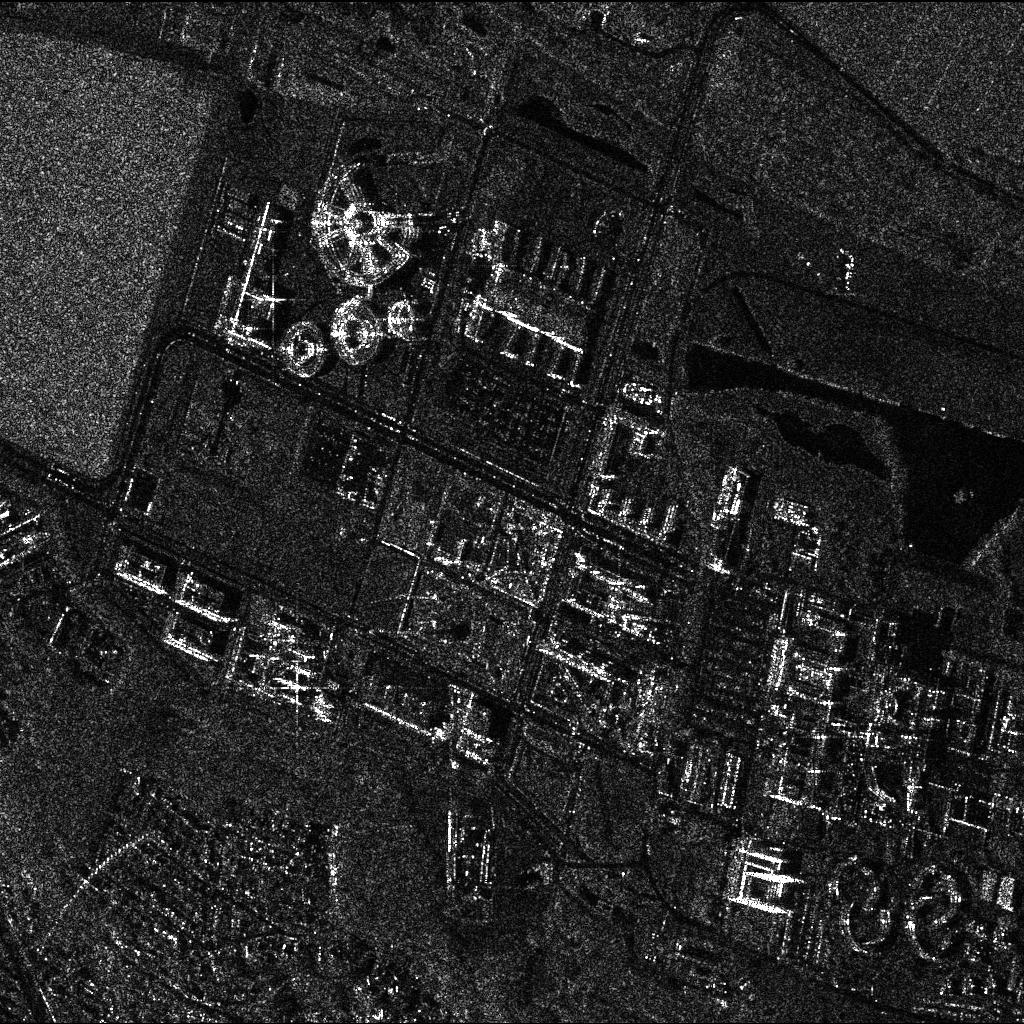
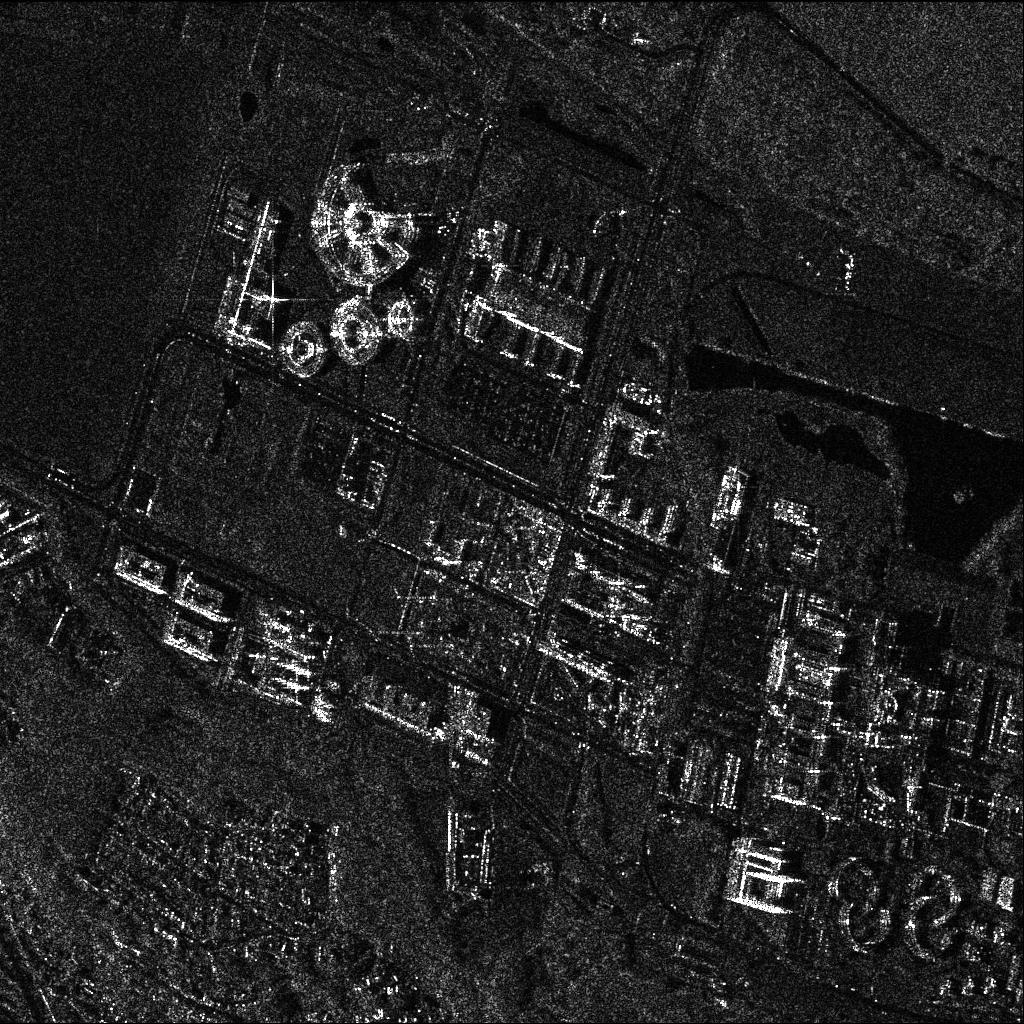
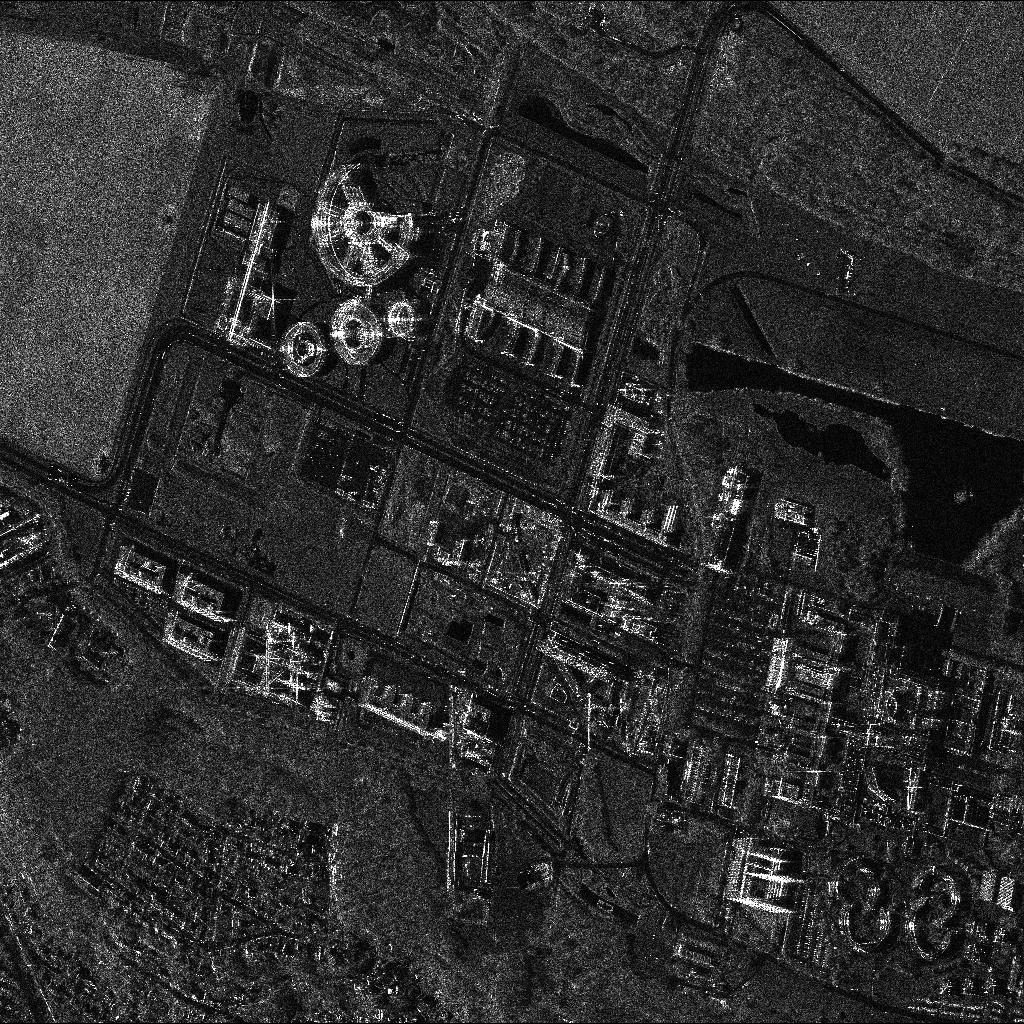
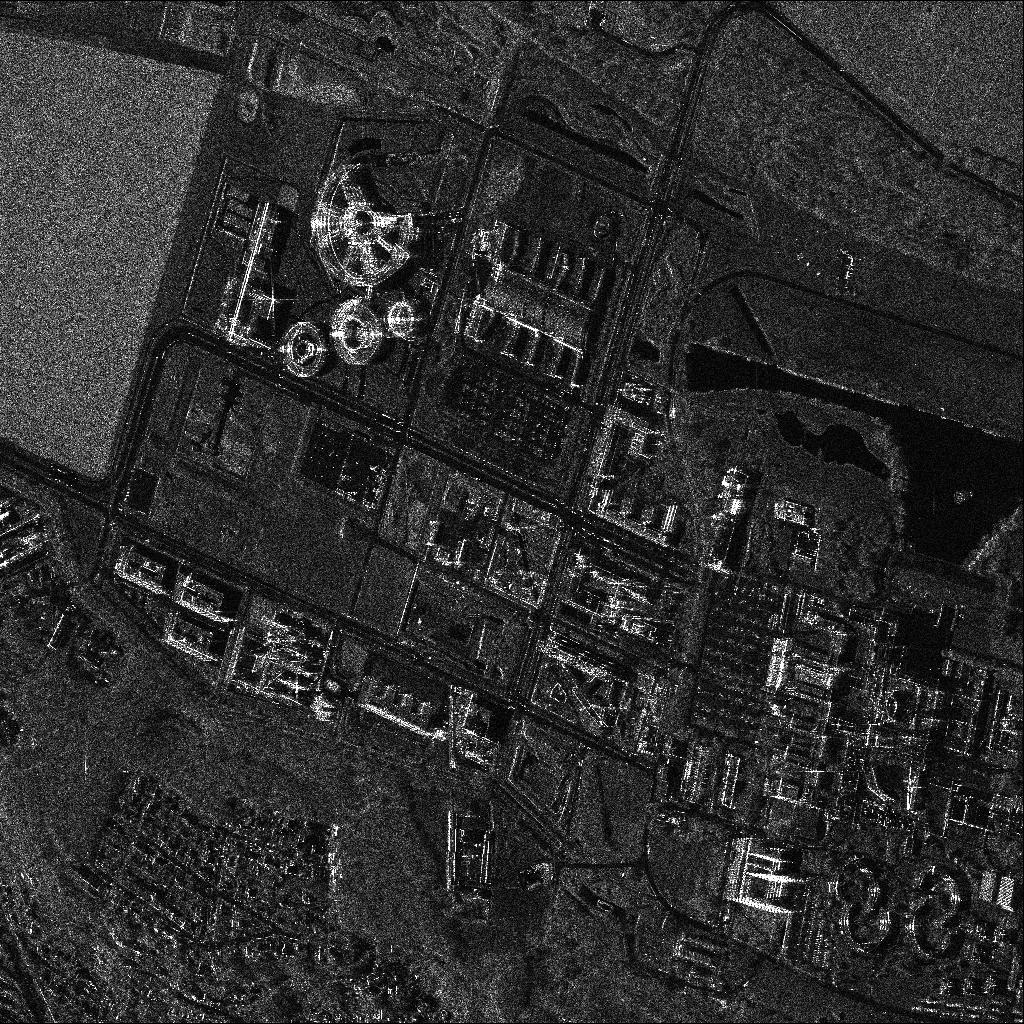

In [4]:
images1 = [utils.simple_equalization_8bit(saclayopt[0][:, :, i], 1) for i in range(3)]
images2 = [utils.simple_equalization_8bit(np.abs(saclayz4[0][:, :, i]), 1) for i in range(5)]

vistools.display_gallery(images1[0:1] + images2)

In [6]:
m = MI.MI(2)

In [10]:
res = m.forward(torch.Tensor(images1[0].astype(float)), torch.Tensor(images2[0].astype(float)))

RuntimeError: index -9223372036854775808 is out of bounds for dimension 0 with size 68